In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast 
from matplotlib import animation, rc
from matplotlib.pyplot import figure
from matplotlib.patches import Circle, Rectangle
from matplotlib.animation import FuncAnimation
rc('animation', html='html5')

In [91]:
#model = "barrier0_R1"

def get_traj(model):
    df = pd.read_csv("output/gridworld_continuous/single_trajs/{}.csv".format(model), header=None)
    trajs = []
    for ridx, row in df.iterrows():
        traj = []
        for cidx, col in enumerate(list(df)):
            elem = df.iloc[ridx, cidx]
            if pd.isna(elem):  # if we find Nan, just repeat last element
                traj.append(traj[-1])
            else:
                elem = np.array(elem[1:-1].split()).astype(float)
                traj.append(elem)
        trajs.append(np.stack(traj))
    return trajs

from dtw import *

def calc_distance(trajs):
    alignment = dtw(trajs[0][0],trajs[1][0], keep_internals=True)
    print(alignment.normalizedDistance)

model pair ('barrier02_R1', 'barrier02_L1')
6.794683722605513
model pair ('barrier6_R1', 'barrier6_L1')
6.175088774631349


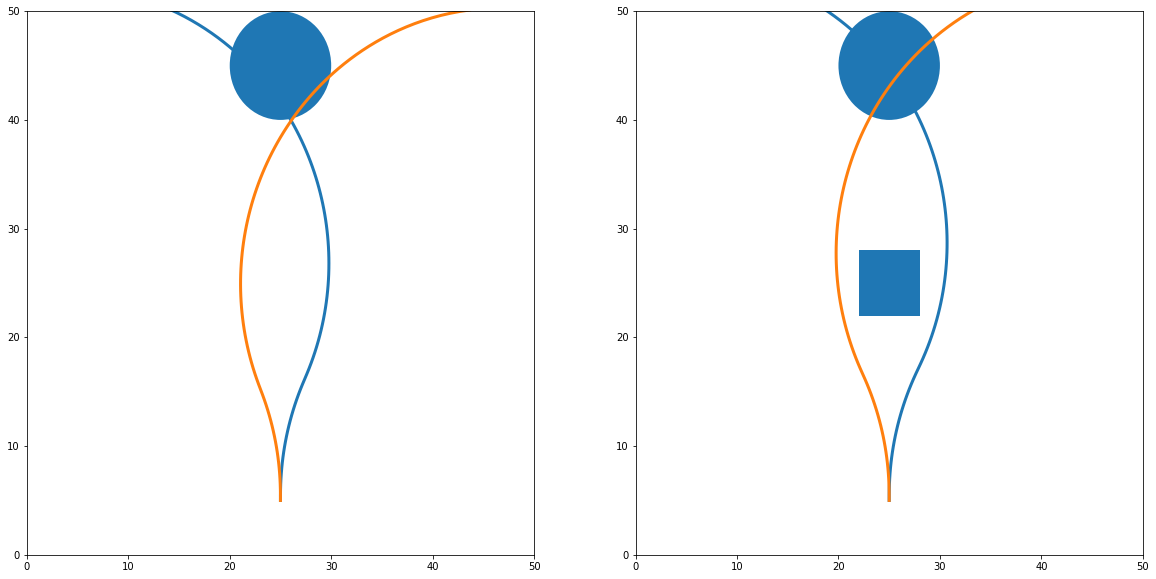

In [109]:
width = 50
height = 50
fig, axs = plt.subplots(1,2, figsize=(20,10))
for i, model_pair in enumerate([('barrier02_R1', 'barrier02_L1'), ('barrier6_R1', 'barrier6_L1')]):
    print("model pair", model_pair)
    ax = axs[i]
    ax.set_xlim(0,50)
    ax.set_ylim(0,50)
    goal = Circle((width/2., height-5.), 5)
    ax.add_patch(goal)
    barrier_size = int(model_pair[0][7])
    if barrier_size>0:
        centerx, centery = width/2., height/2.
        barrier = Rectangle((centerx-(barrier_size/2.), centery-(barrier_size/2.)), barrier_size, barrier_size)
        ax.add_patch(barrier)
    trajs = []
    for model in model_pair:
        traj = get_traj(model)
        trajs.append(traj)
        ax.plot(traj[0][:,0], traj[0][:,1], lw=3)
    calc_distance(trajs)
    #break
    
